In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df =pd.read_csv(r'C:\Users\Abdul Mueed\Downloads\4-IPL data Analysis-20210919T103636Z-001\4-IPL data Analysis/matches.csv')

In [30]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,04-05-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,04-06-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,04-07-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,04-08-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,04-08-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [31]:
df.isnull()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
632,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
633,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
634,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [32]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [33]:
df.shape

(636, 18)

In [34]:
df.drop(['umpire3'],axis = 1, inplace = True)

In [35]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [36]:
Teams = {'Royal Challengers Bangalore' :'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':"GL", 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RP'
    
}

In [37]:
df['team1'] = df['team1'].map(Teams)
df['team2'] = df['team2'].map(Teams)
df['toss_winner'] = df['toss_winner'].map(Teams)
df['winner'] = df['winner'].map(Teams)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,04-05-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,04-06-2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,04-07-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,04-08-2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,04-08-2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [38]:
df.shape[0]

636

In [39]:
cities = df['city'].unique()
cities

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan],
      dtype=object)

In [40]:
len(df['city'].unique())

31

In [41]:
len(df['team1'].unique())

14

In [42]:
df['player_of_match'].value_counts().head(10)

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

In [43]:
filter = df['win_by_runs'].max()
df[df['win_by_runs'] == filter] 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,05-06-2017,MI,DD,DD,field,normal,0,MI,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


In [44]:
filter = df['win_by_wickets'].max()
df[df['win_by_wickets'] == filter]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,04-07-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,4/30/2017,DD,KXIP,KXIP,field,normal,0,KXIP,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,4/27/2008,MI,DC,DC,field,normal,0,DC,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,4/19/2009,KXIP,DD,DD,field,normal,1,DD,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,3/18/2010,RR,RCB,RCB,field,normal,0,RCB,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,5/20/2011,MI,RR,MI,bat,normal,0,RR,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,5/20/2012,RR,MI,RR,bat,normal,0,MI,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,04-10-2013,KXIP,CSK,CSK,field,normal,0,CSK,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,4/26/2015,DD,RCB,RCB,field,normal,0,RCB,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,4/21/2016,GL,SRH,SRH,field,normal,0,SRH,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


In [45]:
teams = (df['team1'].value_counts() + df['team2'].value_counts()).reset_index()
teams.columns = ['team','matches_played']
teams

,team,matches_played
0,CSK,131
1,DC,75
2,DD,147
3,GL,30
4,KKR,148
5,KTK,14
6,KXIP,148
7,MI,157
8,PW,46
9,RCB,152


In [49]:
wins = df['winner'].value_counts().reset_index()
wins.columns = ['team','wins']
wins

,team,wins
0,MI,92
1,CSK,79
2,KKR,77
3,RCB,73
4,KXIP,70
5,RR,63
6,DD,62
7,SRH,42
8,DC,29
9,GL,13


In [50]:
teams_data = teams.merge(wins)
teams_data['win_percent'] = ((teams_data['wins'] / teams_data['matches_played']) * 100).round(2)
teams_data

,team,matches_played,wins,win_percent
0,CSK,131,79,60.31
1,DC,75,29,38.67
2,DD,147,62,42.18
3,GL,30,13,43.33
4,KKR,148,77,52.03
5,KTK,14,6,42.86
6,KXIP,148,70,47.30
7,MI,157,92,58.60
8,PW,46,12,26.09
9,RCB,152,73,48.03


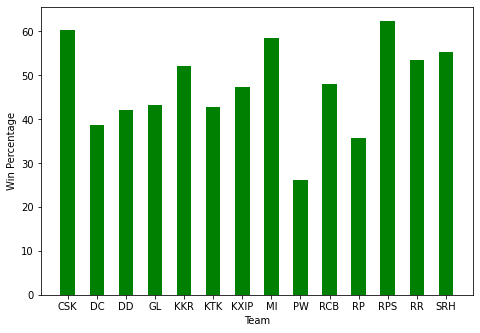

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
player = teams_data['team']
percent = teams_data['win_percent']
ax.bar(player,percent, color = 'g',width = 0.5)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.show()

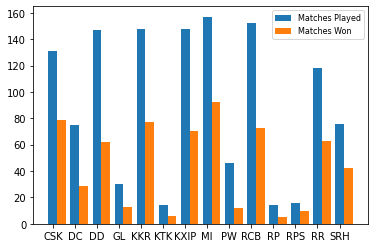

In [52]:
data1 = teams_data['matches_played']
data2 = teams_data['wins']
width =0.4
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
my_xticks = ['CSK','DC','DD','GL','KKR','KTK','KXIP','MI','PW','RCB','RP','RPS','RR','SRH']
plt.xticks(x, my_xticks)
plt.bar(np.arange(len(data1)), data1, width=width,label = 'Matches Played')
plt.bar(np.arange(len(data2))+ width, data2, width=width, label = 'Matches Won')
plt.legend(fontsize=8)
plt.show()

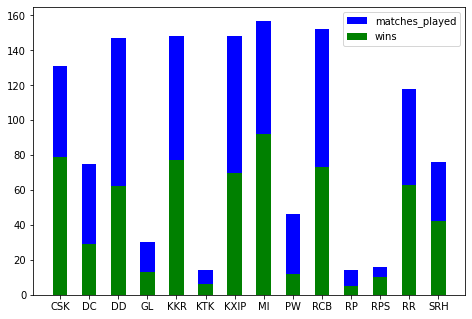

In [53]:
data3 = teams_data['matches_played']
data4 = teams_data['wins']
data5 = teams_data['team']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar( data5, data3, color = 'b', width = 0.5)
ax.bar( data5, data4, color = 'g', width = 0.5)
ax.legend(labels=['matches_played', 'wins'])

<AxesSubplot:xlabel='season', ylabel='count'>

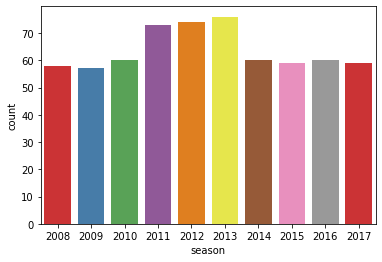

In [54]:
sns.countplot(data =df, x ='season',palette = "Set1")